In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [196]:
df = pd.read_csv("data/info_fornecedores.csv")

# Análise Descritiva
Boxplot

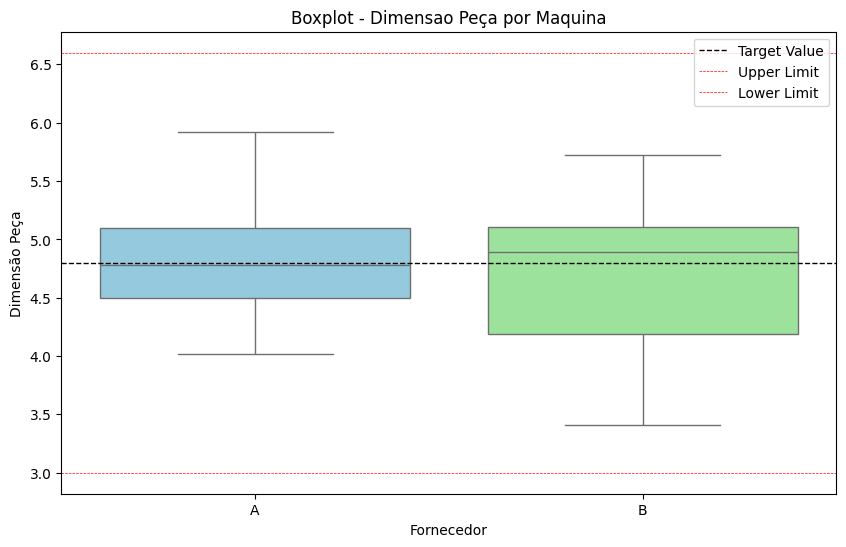

In [197]:
def plot_box_plot(df):
    colors = ['#87CEEB', '#90EE90']

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='fornecedor', y='dimensao_peca', data=df, palette=colors, hue='fornecedor', dodge=False, linewidth=1)

    # Plot horizontal line at 4.8
    plt.axhline(y=4.8, color='k', linestyle='--', label='Target Value', linewidth=1)
    plt.axhline(y=(4.8 + 1.8), color='r', linestyle='--', label='Upper Limit', linewidth=0.5)
    plt.axhline(y=(4.8 - 1.8), color='r', linestyle='--', label='Lower Limit', linewidth=0.5)

    plt.title('Boxplot - Dimensao Peça por Maquina')
    plt.xlabel('Fornecedor')
    plt.ylabel('Dimensão Peça')
    plt.legend(loc='upper right')
    plt.show()

plot_box_plot(df)

Histograma

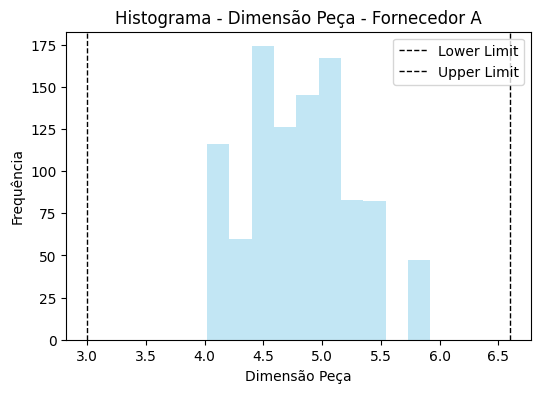

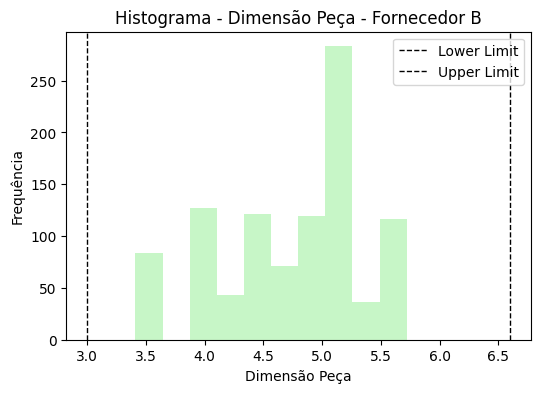

In [198]:
def plot_histograms(df):
    colors = ['#87CEEB', '#90EE90']

    for i, fornecedor in enumerate(df['fornecedor'].unique()):
        supplier_data_dimensao = df[df['fornecedor'] == fornecedor]['dimensao_peca']
        plt.figure(figsize=(6, 4))
        
        plt.hist(supplier_data_dimensao, bins=10, alpha=0.5, color=colors[i])
        

        plt.axvline(x=4.8 - 1.8, color='k', linestyle='--', label='Lower Limit', linewidth=1)
        plt.axvline(x=4.8 + 1.8, color='k', linestyle='--', label='Upper Limit', linewidth=1)
        
        plt.title(f'Histograma - Dimensão Peça - Fornecedor {fornecedor}')
        plt.xlabel('Dimensão Peça')
        plt.ylabel('Frequência')
        plt.legend()
        plt.show()
        
plot_histograms(df)

# Analisando a média

In [199]:
df.groupby('fornecedor')['dimensao_peca'].agg(['mean'])

,mean
fornecedor,
A,4.81291
B,4.72676


# Estimação de erro

In [200]:
def calculate_error(df):
    df['error'] = 0
    df.loc[(df['dimensao_peca'] > (4.8 + 0.3)) | (df['dimensao_peca'] < (4.8 - 0.3)), 'error'] = 1
    return

calculate_error(df)

df.groupby('fornecedor')['error'].agg(['mean'])

,mean
fornecedor,
A,0.437
B,0.649


# Teste de Hipótese

Hipótese Nula (H0): Não existe diferença significativa entre as médias de erros entre o Fornecedor A e o Fornecedor B.

Hipótese Alternativa (H1): Existe significância entre as médias de erros.

In [202]:
import statsmodels.formula.api as smf

result = smf.ols('error ~ fornecedor', data=df).fit()

print(result.summary().tables[1])


                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4370      0.015     28.377      0.000       0.407       0.467
fornecedor[T.B]     0.2120      0.022      9.734      0.000       0.169       0.255
